# Facial Data Recognition Using SVM Classifier

**1. Reading all the necessary libraries**

In [159]:
import numpy as np # Used for calculating statistical mesures and loading data in arrays
import pandas as pd # Used for analyzing the summary of the data
from matplotlib import pyplot as plt # Plotting figures and images
from sklearn.model_selection import train_test_split # Used to split the test data in training and testing set
from sklearn.datasets import fetch_olivetti_faces # Used to load the Olivetti dataset from sk-learn which consists of 400 samples
from sklearn.model_selection import GridSearchCV # Used for hyperparameter tuning
from sklearn.metrics import classification_report # Used to create a classification report for classes after applying the SVM Classifier for prediction
from sklearn.metrics import confusion_matrix #Used to populate the Confusion Matrix
from sklearn.decomposition import PCA as RandomizedPCA # To implement Dimensionality Reduction on 4096 features of the high-dimensional dataset
from sklearn.svm import SVC # Fit an SVM classifier to classify the images into classes
import warnings
warnings.filterwarnings('ignore')

**2. Read the facial image data:Load the Olivetti faces data-set from AT&T (classification).** 

| Classes | Samples total | Dimensionality | Features |
| --- | --- | --- |--- |
| 40 | 400 | 4096 | real, between 0 and 1 |

In [160]:
olivetti_faces = fetch_olivetti_faces(shuffle = True)

In [161]:
olivetti_faces.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [162]:
n_samples, h, w =  olivetti_faces['images'].shape
np.random.seed(42)

In [163]:
n_samples

400

In [164]:
h

64

In [165]:
w

64

In [166]:
X = olivetti_faces.data
n_features = X.shape[1]

In [167]:
n_features

4096

**3. The size and dimension of the dataset of the dataset**

| n_samples |  height | width | features |
| --- | --- | --- | --- |
| 400 | 64 | 64 | 4096

In [168]:
y = olivetti_faces.target

In [169]:
y.shape

(400,)

**4. The facial data is plotted below of the real high-dimensional pixel classes.**

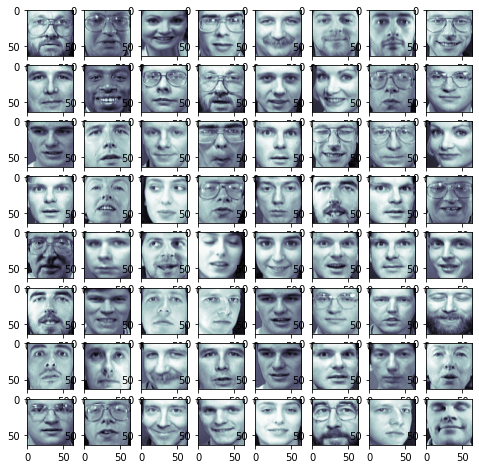

In [170]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax= fig.add_subplot(8,8,i+1)
    ax.imshow(olivetti_faces.images[i] , cmap=plt.cm.bone)
plt.show()

In [171]:
y

array([13, 30, 34, 19, 24,  6, 15, 26, 14, 21,  3, 13, 11, 34,  1,  5, 29,
       14, 20, 19, 17, 26, 12, 34, 17, 31,  7,  1, 28, 10, 17, 30, 33, 22,
        6,  7,  9, 17, 17, 39, 10, 32,  0,  0, 29,  5, 37, 25, 15, 23, 24,
       14, 29, 17, 28, 31,  5,  1,  2,  4,  7, 27,  0, 35, 19, 37, 14,  0,
       15, 31,  0, 26,  6,  2, 10,  1, 36, 30, 36, 32, 33,  6,  5, 10, 30,
       22, 12, 37, 39, 32, 38, 25,  5,  0, 19, 14, 13, 39, 26, 36, 25,  6,
       31, 15, 28, 34,  8, 34, 15, 29,  9,  8, 29,  2, 36, 21, 25,  4, 23,
       34,  9, 22, 23, 23, 37, 14,  2, 25, 35, 16, 15, 39,  6, 24, 21, 10,
       31, 19, 32,  1, 16, 18,  3, 11, 26, 10, 35, 24, 23, 11, 33, 12, 28,
       11, 21, 13, 27, 12, 19, 29, 28, 13,  3, 37, 16,  3, 23,  9,  8,  6,
       16, 28, 20, 39, 23, 28, 10,  4, 32, 39, 22,  7, 13, 38, 22, 21,  2,
       18, 36, 27,  5, 32, 35,  2,  0, 21, 15, 21, 37, 22, 13, 23, 21, 27,
       27, 30, 23,  3, 20, 39,  6,  2, 33,  4, 24, 12,  9, 11, 16, 38, 38,
       34,  4,  1, 28,  7

**5. Splitting the data with 75% of the data in the Training set and 25% of the data ion the Test set**

In [172]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

**6. Measures of Dispersion on the training and test set**

In [173]:
min_xtrain = np.amin(X_train)
max_xtrain = np.amax(X_train)
mean_xtrain = np.mean(X_train)
range_xtrain = np.ptp(X_train)
variance_xtrain = np.var(X_train)
sd_xtrain = np.std(X_train)

print("Measures of Dispersion X_train")
print("Minimum =", min_xtrain)
print("Maximum =", max_xtrain)
print("Mean =", mean_xtrain)
print("Range =", range_xtrain)
print("Variance =", variance_xtrain)
print("Standard Deviation =", sd_xtrain)

min_xtest = np.amin(X_test)
max_xtest = np.amax(X_test)
mean_xtest = np.mean(X_test)
range_xtest = np.ptp(X_test)
variance_xtest = np.var(X_test)
sd_xtest = np.std(X_test)

print("Measures of Dispersion X_test")
print("Minimum =", min_xtest)
print("Maximum =", max_xtest)
print("Mean =", mean_xtest)
print("Range =", range_xtest)
print("Variance =", variance_xtest)
print("Standard Deviation =", sd_xtest)

Measures of Dispersion X_train
Minimum = 0.004132231
Maximum = 1.0
Mean = 0.54579794
Range = 0.9958678
Variance = 0.029483601
Standard Deviation = 0.1717079
Measures of Dispersion X_test
Minimum = 0.0
Maximum = 0.9710744
Mean = 0.55077565
Range = 0.9710744
Variance = 0.030576717
Standard Deviation = 0.174862


**7. Implementing dimensionality reduction of 4096 features to 10 features using Principal Component Analysis.**

In [174]:
n_components = 10
pca = RandomizedPCA(n_components=n_components, whiten=True).fit(X_train)
eigenfaces = pca.components_.reshape((n_components, h, w))

In [175]:
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

**8. Using GridSearchCV  package for Hyperparameter tuning of C and gamma.**

In [176]:
print("Fitting the classifier to the training set")
param_grid = {
         'C': [1e3, 5e3, 1e4, 5e4, 1e5, 1e6],
          'gamma': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1],
          }
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print("Best estimator found by grid search:")
print(clf.best_estimator_)

Fitting the classifier to the training set
Best estimator found by grid search:
SVC(C=1000.0, class_weight='balanced', gamma=0.1)


**9. Predicting the target variable of the test data**

In [177]:
print("Predicting the people names on the testing set")
y_pred = clf.predict(X_test_pca)

Predicting the people names on the testing set


In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.50      0.67         4
           1       1.00      1.00      1.00         5
           2       1.00      0.75      0.86         4
           3       1.00      1.00      1.00         1
           5       0.83      1.00      0.91         5
           6       0.75      0.60      0.67         5
           7       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         1
          11       1.00      1.00      1.00         1
          12       1.00      1.00      1.00         1
          13       1.00      1.00      1.00         2
          15       0.50      1.00      0.67         3
          16       1.00      1.00      1.00         2
          17       1.00      1.00      1.00         1
          18       0.67      1.00      0.80         2
          19       1.00      1.00      1.00         6
          20       1.00      1.00      1.00         4
          21       1.00    

In [179]:
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))

[[2 0 0 0 0]
 [0 5 0 0 0]
 [0 0 3 0 0]
 [0 0 0 1 0]
 [0 0 0 0 0]]


**10. Plotting the predicted variable in the testing data**

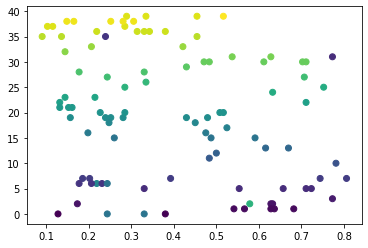

In [180]:
plt.scatter(X_test[:,0],y_test, c=y_pred)
plt.show()

In [181]:
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'predicted: %s\ntrue:      %s' % (pred_name, true_name)
def plot_gallery(images, titles, h, w, n_row=9, n_col=5):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())

**11. Plotting the eigen faces after dimensionality reduction**

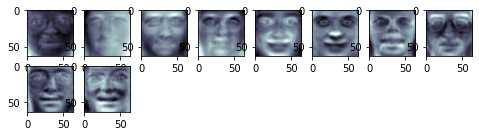

In [182]:
eigenv = pca.components_
eigenfaces = eigenv.reshape(10,64,64)
fig = plt.figure(figsize = (8,8))
for i in range(10):
    ax = fig.add_subplot(8,8,i+1)
    ax.imshow(eigenfaces[i] , cmap = plt.cm.bone)
plt.show()

**12. Calculating the accuracy of the model using the actual and predicted values**

In [183]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
print(score)

0.89
